## Round Robin

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy

%load_ext autoreload
%autoreload 2

In [3]:
class RoundRobin(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Round Robin"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.previous_action = None
    
    def act(self):
        if self.previous_action == None:
            current_action = 0
        else:
            current_action = (self.previous_action + 1) % self.num_actions
        self.previous_action = current_action

        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1    

Distribution: bernoulli [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496]
Optimal action: 1


<Figure size 720x360 with 0 Axes>

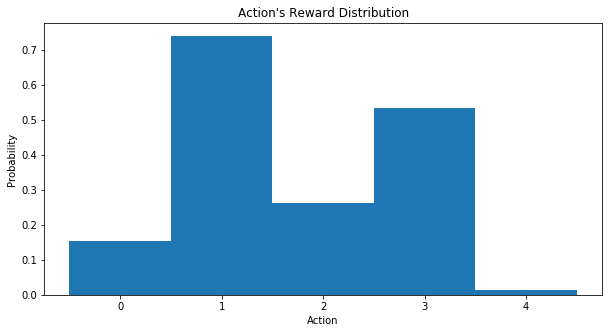

--------------------------------------------------
Policy: Round Robin 
Average Reward: 0.347 
Average Regret: 0.39888131452619363
Arm pulls: [2000. 2000. 2000. 2000. 2000.]


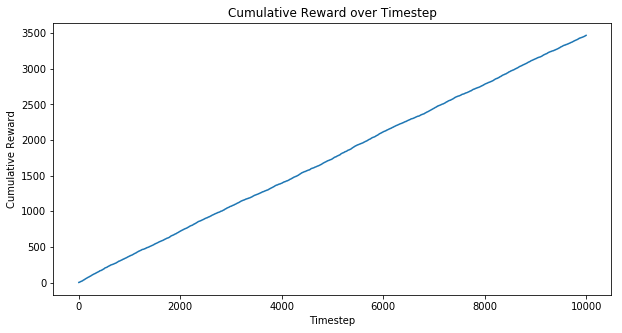

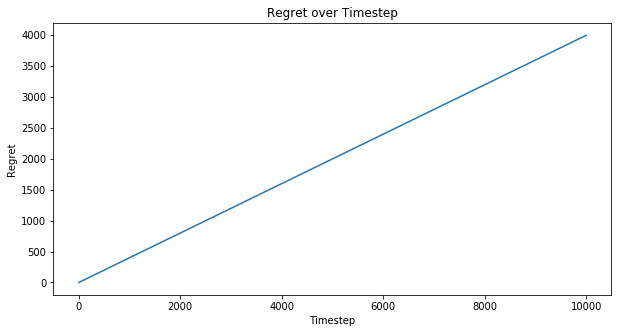

In [7]:
evaluation_seed = 12
num_actions = 5
trials = 10000
distribution = "bernoulli"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = RoundRobin(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Distribution: normal [ 0.47298583 -0.68142588  0.2424395  -1.70073563  0.75314283]
Optimal action: 4


<Figure size 720x360 with 0 Axes>

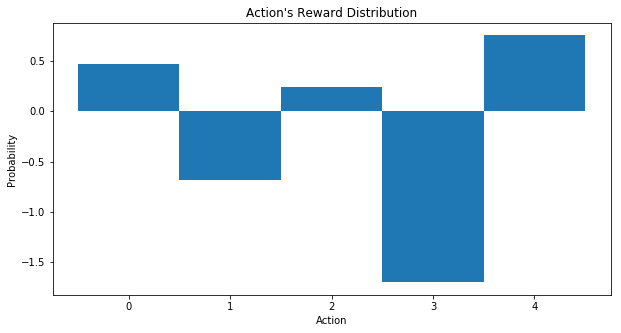

--------------------------------------------------
Policy: Round Robin 
Average Reward: -0.1968660220419905 
Average Regret: 0.9358615042187705
Arm pulls: [2000. 2000. 2000. 2000. 2000.]


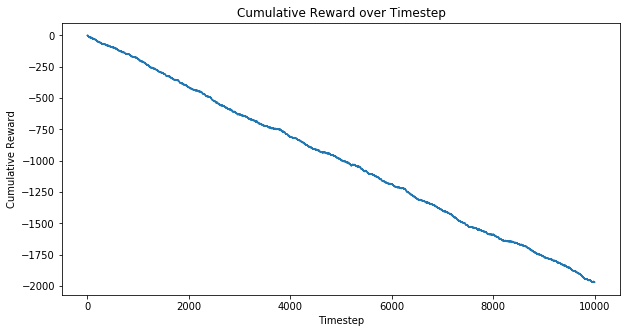

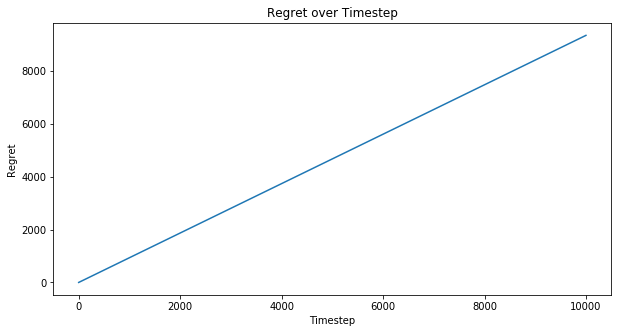

In [8]:
evaluation_seed = 12
num_actions = 5
trials = 10000
distribution = "normal"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = RoundRobin(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)